<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/PCA_WBCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.linkedin.com/pulse/using-pca-reduce-dimensions-predicting-cancer-case-rany-rdjac?source=post_page-----8f13954c0bc5--------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
X = data.data # Features
y = data.target # Target

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Here's a step-by-step breakdown of what each line does:

1. from sklearn.preprocessing import StandardScaler:This line imports the StandardScaler class from the scikit-learn library. StandardScaler is a preprocessing utility that is used to scale the features of a dataset.

2. scaler = StandardScaler():An instance of the StandardScaler class is created and assigned to the variable scaler. This instance will be used to compute the mean and standard deviation needed for later scaling of the dataset.
3. X_scaled = scaler.fit_transform(X):The fit_transform() method is called on the scaler instance. This method does two things:fit: It computes the mean and standard deviation for each feature in the dataset X. These statistics are then used to scale the data.transform: It scales the dataset X by using the mean and standard deviation calculated from the fit method. This is done by subtracting the mean value of each feature and then dividing by the standard deviation of each feature. The result is assigned to X_scaled. After this transformation, each feature in X_scaled will have a mean value of 0 and a standard deviation of 1.

The purpose of standardization is to ensure that each feature contributes equally to the analysis and to avoid biasing the results towards features with larger magnitudes. This is particularly important in algorithms that are sensitive to the scale of the data, such as PCA, as well as many machine learning algorithms like support vector machines, k-nearest neighbors, and logistic regression.

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

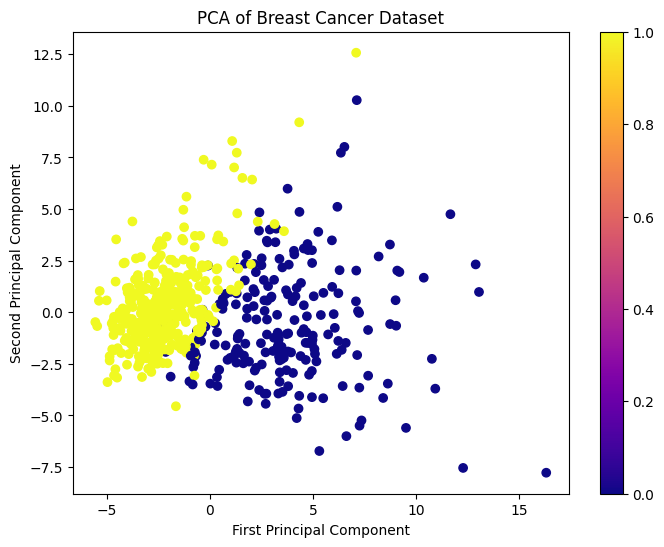

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar()
plt.show()

As you can see from this plot, in spite of reducing the features from 30 to 2, we are able to have two separate clusters of benign vs malignant. This means we did not need all those details in the original 30 features and reduced them to two PCs and still able to get enough information to have separate clusters. This means if you are to run a classification algorithm like K-Means on the reduced features (PC1 and PC2), and you will get very similar performance. You are saving space, training time, and able to visualize it easier.

c=y: The color (c) argument specifies the colors of the points in the scatter plot. Here, y is an array containing the target variable, which in the context of the Wisconsin Breast Cancer Dataset, represents whether the tumor is malignant or benign. The value of y for each point will determine the color of that point on the scatter plot.

In [21]:
pca.n_components_

2

In [22]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [33]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
features = pd.DataFrame(X, columns=data.feature_names)

df_comp = pd.DataFrame(pca.components_,      index=['PC1', 'PC2'], columns=features.columns)

df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [8]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
np.sum(pca.explained_variance_ratio_)
# two components cover 63% of total data

Explained variance ratio: [0.44272026 0.18971182]


0.6324320765155951

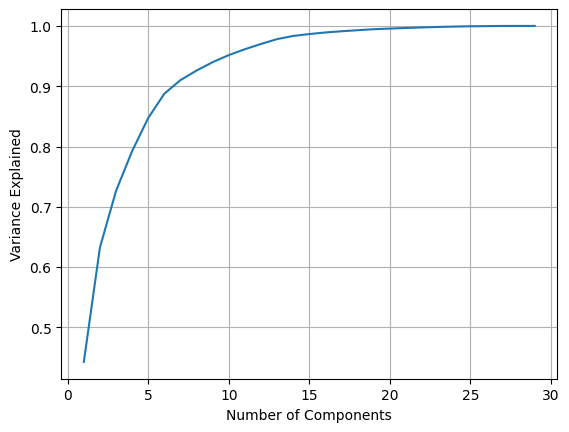

In [17]:
variances = []

for n in range(1, 30):
    pca = PCA(n_components=n)
    pca.fit(X_scaled)

    variances.append(np.sum(pca.explained_variance_ratio_))

plt.plot(range(1, 30), variances)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.grid()

# elbow method, maybe components of 7 ?